In [181]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
U = 5  # Velocity of flow
a = 2  # Radius of the cylinder

In [183]:
x = 3  
y = 4

z = x + 1j * y

In [184]:
# FLow around a cylinder
def F(z):
    return U * (z + a**2 / z)

In [185]:
def phi(z):
    return np.real(F(z))

def psi(z):
    return np.imag(F(z))

In [186]:
print(f"Flow around a cylinder at ({x}, {y}): phi = {phi(z)}, psi = {psi(z)}")

Flow around a cylinder at (3, 4): phi = 17.4, psi = 16.8


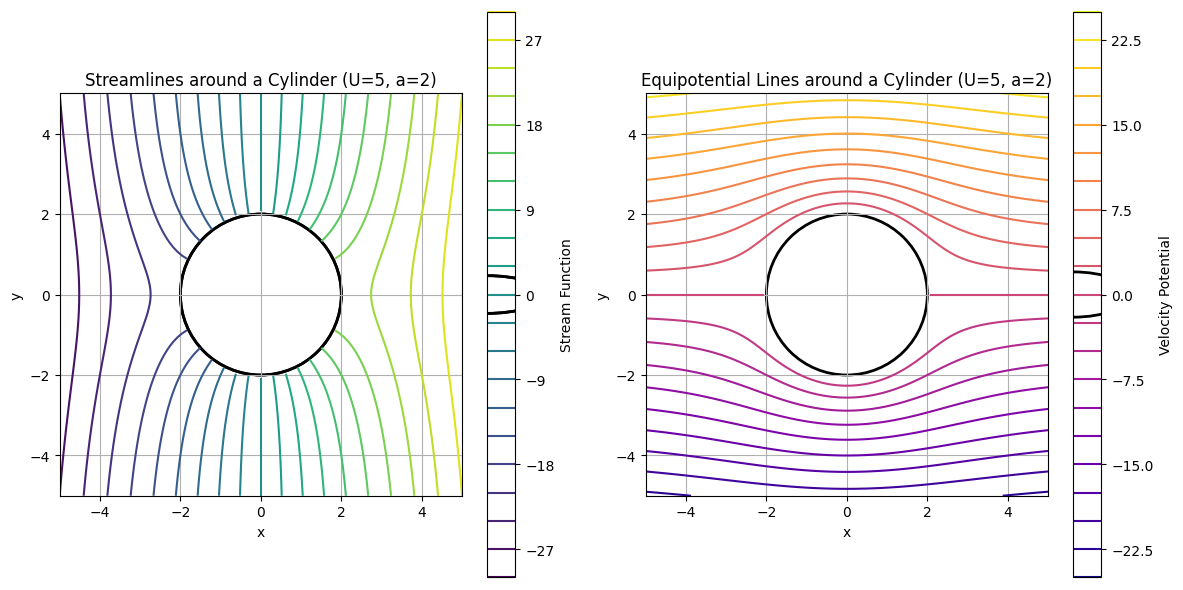

In [189]:
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x_range, y_range)

phi_values = np.zeros_like(X)
psi_values = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        phi_values[i, j] = psi(X[i, j] + 1j*Y[i, j])
        psi_values[i, j] = phi(X[i, j] + 1j*Y[i, j])

mask = np.abs(X + 1j*Y) >= a
psi_masked = np.where(mask, psi_values, np.nan)
phi_masked = np.where(mask, phi_values, np.nan)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contour(X, Y, psi_masked, levels=20, cmap='viridis')
plt.colorbar(label="Stream Function")
plt.title(f"Streamlines around a Cylinder (U={U}, a={a})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

# Plot the cylinder boundary
for ax in plt.gcf().axes:
    cylinder = plt.Circle((0, 0), a, color='black', fill=False, linewidth=2)
    ax.add_patch(cylinder)

plt.subplot(1, 2, 2)
plt.contour(X, Y, phi_masked, levels=20, cmap='plasma')
plt.colorbar(label="Velocity Potential")
plt.title(f"Equipotential Lines around a Cylinder (U={U}, a={a})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

# Plot the cylinder boundary
for ax in plt.gcf().axes:
    cylinder = plt.Circle((0, 0), a, color='black', fill=False, linewidth=2)
    ax.add_patch(cylinder)

plt.tight_layout()
plt.show()